$ \textbf{Aluna:}$ Alessandra da Silva Dias Malizia   
$ \textbf{Data:}$ 14/05/2025

# Lista Prática 1

In [1]:
import numpy as np
import math
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
rng = np.random.default_rng(seed=4)

# Questão 2 - Simulações

In [3]:
def state_space_model(Z, T, R, c, d, σ=None, N=120, fZ = None):
    
    m, r = T.shape[0], R.shape[1]
    if σ is None: σ = rng.random()*10
    Q = np.diag(rng.random(r)*10)
    
    ηt = rng.multivariate_normal(mean=np.zeros(r), cov=Q, size=N)
    ϵt = rng.normal(0, σ, N)
    ϵt = ϵt.reshape(1,-1)

    data = pd.DataFrame()
    for j in range(5):
        α1 = rng.random(m)*10**j//2
        αt = α1.copy()
        yt = np.zeros((1,N))
        
        for i in range(N):
            if fZ: Z = fZ(yt, i) 
            yt[:,i] = Z@αt + d + ϵt[:,i]
            αt = T@αt + c + R@ηt[i]
        data.loc[:,j] = yt[0]
    return data

In [4]:
# cálculo da matriz M' 
def calcula_M(Z, T):
    M_list = [Z.T]
    T_power = T.copy()
    
    for i in range(T.shape[0]-1):
        term = T_power.T @ Z.T
        M_list.append(term)
        T_power = T @ T_power
    
    M = np.hstack(M_list)
    return M

## a) 
O vetor de estado é uma componente de nível local, que segue um passeio aleatório.  
O modelo é não estacionário e observável.

In [5]:
Z = np.array([[1]])
T = np.array([[1]])
R = np.array([[1]])
c, d = c, d = np.zeros(1), np.zeros(1)

data = state_space_model(Z, T, R, c, d)

# cálculo dos autovalores
print("Autovalores: \n", np.linalg.eigvals(T))

Autovalores: 
 [1.]


In [6]:
# cálculo da matriz M' 
M = calcula_M(Z,T)
print("Matriz M':\n", M)
rank_M = np.linalg.matrix_rank(M)
print("Posto da matriz M:", rank_M)

Matriz M':
 [[1]]
Posto da matriz M: 1


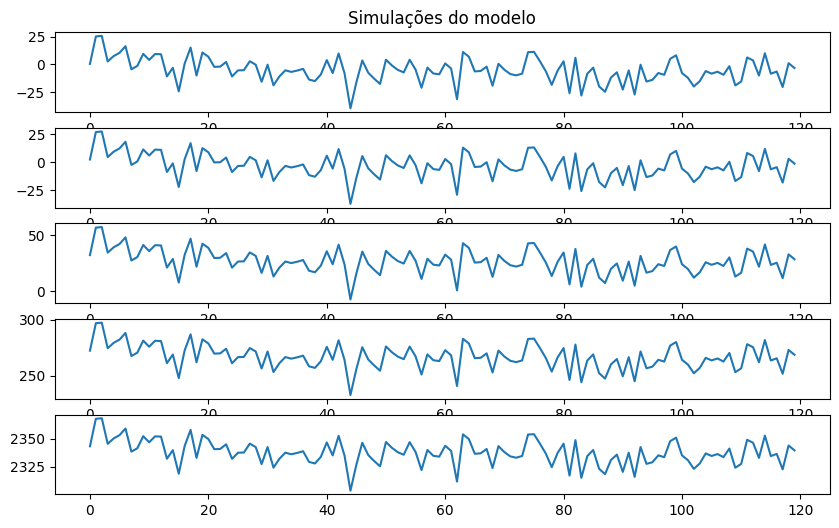

In [7]:
fig, ax = plt.subplots(5, figsize=(10,6))

for i in range(5):
    ax[i].plot(data.iloc[:,i])
ax[0].set_title('Simulações do modelo')
del data
plt.show()

## b)
O modelo é um ARMA(p,q) estacionário e não observável. Para corrigir a observabilidade, é necesário reescrever a FEE, removendo um dos componentes do vetor de estado.   
As componentes do vetor de estado são os valores defasados da série e do erro.  
Para p=2 e q=1:

In [8]:
Z = np.array([[1,0,0]])

θ = 0.2
ϕ1, ϕ2 = 0.3, 0.5
T = np.array([[ϕ1,ϕ2,θ], [1,0,0], [0,0,0]])
R = np.array([[1,0,1]])
c, d = c, d = np.zeros(T.shape[0]), np.zeros(1)
    
data = state_space_model(Z, T, R, c, d, σ=0)

# cálculo dos autovalores
print("Autovalores: \n", np.linalg.eigvals(T))

Autovalores: 
 [ 0.87284161 -0.57284161  0.        ]


In [9]:
# cálculo da matriz M' 
M = calcula_M(Z,T)
print("Matriz M':\n", M)
rank_M = np.linalg.matrix_rank(M)
print("Posto da matriz M:", rank_M)

Matriz M':
 [[1.   0.3  0.59]
 [0.   0.5  0.15]
 [0.   0.2  0.06]]
Posto da matriz M: 2


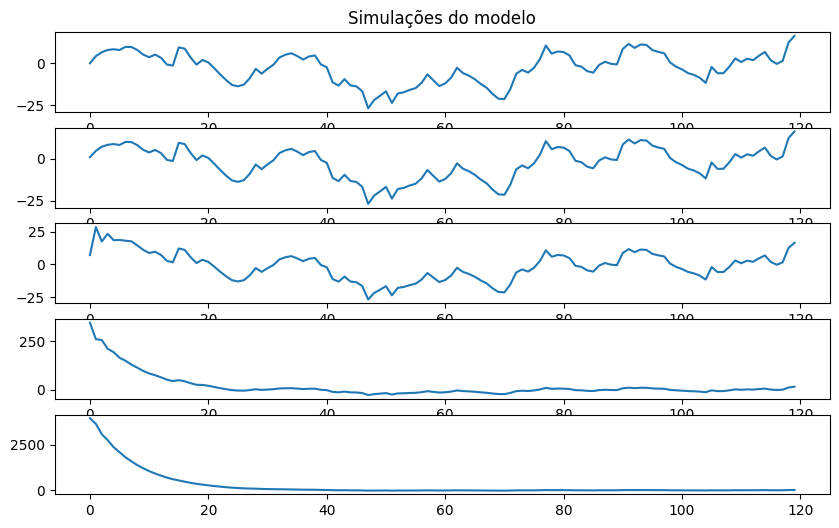

In [10]:
fig, ax = plt.subplots(5, figsize=(10,6))

for i in range(5):
    ax[i].plot(data.iloc[:,i])
ax[0].set_title('Simulações do modelo')
del data
plt.show()

## c) 
O modelo é um ARMA(2,1,1) estacionário e não observável. Para corrigir a observabilidade, é necesário reescrever a FEE, removendo um dos componentes do vetor de estado.
As componentes do vetor de estado são os valores defasados da série e do erro. 

In [11]:
Z = np.array([[1,0,0]])

θ = 0.7
ϕ1, ϕ2 = 0.3, 0.4
T = np.array([[ϕ1,ϕ2,θ], [1,0,0], [0,0,0]])
R = np.array([[1,0,1]])
c, d = c, d = np.array([50, 0, 0]), np.zeros(1)
    
data = state_space_model(Z, T, R, c, d, σ=0)
data = data + data.shift(1, fill_value=5)

# cálculo dos autovalores
print("Autovalores: \n", np.linalg.eigvals(T))

Autovalores: 
 [ 0.8 -0.5  0. ]


In [12]:
# cálculo da matriz M' 
M = calcula_M(Z,T)
print("Matriz M':\n", M)
rank_M = np.linalg.matrix_rank(M)
print("Posto da matriz M:", rank_M)

Matriz M':
 [[1.   0.3  0.49]
 [0.   0.4  0.12]
 [0.   0.7  0.21]]
Posto da matriz M: 2


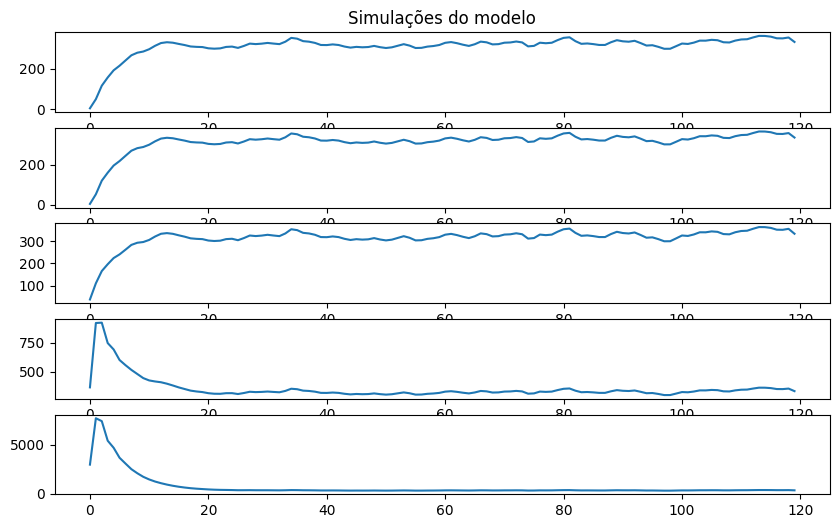

In [13]:
fig, ax = plt.subplots(5, figsize=(10,6))

for i in range(5):
    ax[i].plot(data.iloc[:,i])
ax[0].set_title('Simulações do modelo')
del data
plt.show()

## d)
O vetor de estado é uma componente de tendência linear com slope determinístico. Z depende de y e o modelo é condicionalmente estacionário e observável.

In [14]:
def fZ(y, t):
    if t==0:
        y0 = rng.random(y.shape[0])
        return np.array([y0])
    return y[:,[t-1]]

In [15]:
α = 0.7
β = 8
Z = np.array([[1]])
T = np.array([[α]])
R = np.array([[1]])
c, d = c, d = np.array([β]), np.zeros(1)
    
data = state_space_model(Z, T, R, c, d, fZ=fZ)

# cálculo dos autovalores
print("Autovalores: \n", np.linalg.eigvals(T))

Autovalores: 
 [0.7]


In [16]:
# cálculo da matriz M' 
M = calcula_M(Z,T)
print("Matriz M':\n", M)
rank_M = np.linalg.matrix_rank(M)
print("Posto da matriz M:", rank_M)

Matriz M':
 [[1]]
Posto da matriz M: 1


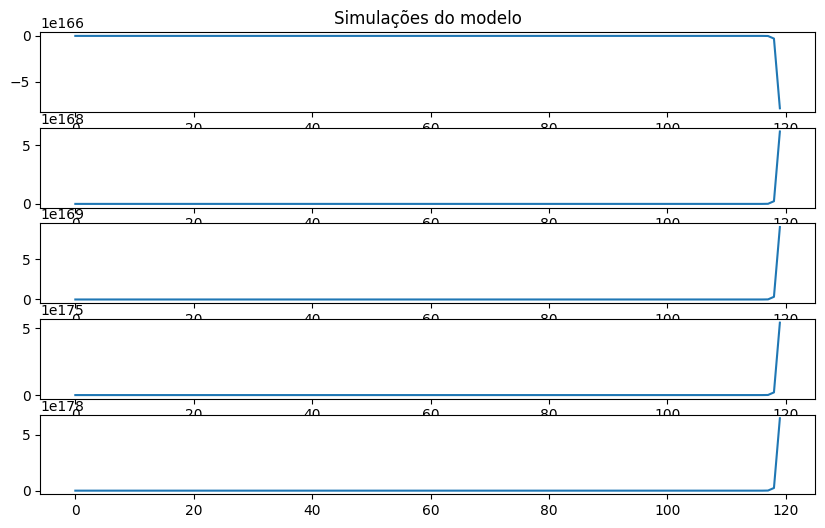

In [17]:
fig, ax = plt.subplots(5, figsize=(10,6))

for i in range(5):
    ax[i].plot(data.iloc[:,i])
ax[0].set_title('Simulações do modelo')
del data
plt.show()

## e)
O vetor de estado é um componente de tendência linear com slope determinístico e uma componente que segue um ARMA(1,1).  
O modelo é não estacionário e observável.

In [18]:
Z = np.array([[1,1,0]])

ϕ, θ = 0.4, 0.7
β = 1.5
T = np.array([[1,0,0], [0,ϕ,θ], [0,0,0]])
R = np.array([[1,0], [0,1], [0,1]])
c, d = c, d = np.array([β,0,0]), np.zeros(1)
    
data = state_space_model(Z, T, R, c, d)

# cálculo dos autovalores
print("Autovalores: \n", np.linalg.eigvals(T))

Autovalores: 
 [1.  0.4 0. ]


In [19]:
# cálculo da matriz M' 
M = calcula_M(Z,T)
print("Matriz M':\n", M)
rank_M = np.linalg.matrix_rank(M)
print("Posto da matriz M:", rank_M)

Matriz M':
 [[1.   1.   1.  ]
 [1.   0.4  0.16]
 [0.   0.7  0.28]]
Posto da matriz M: 3


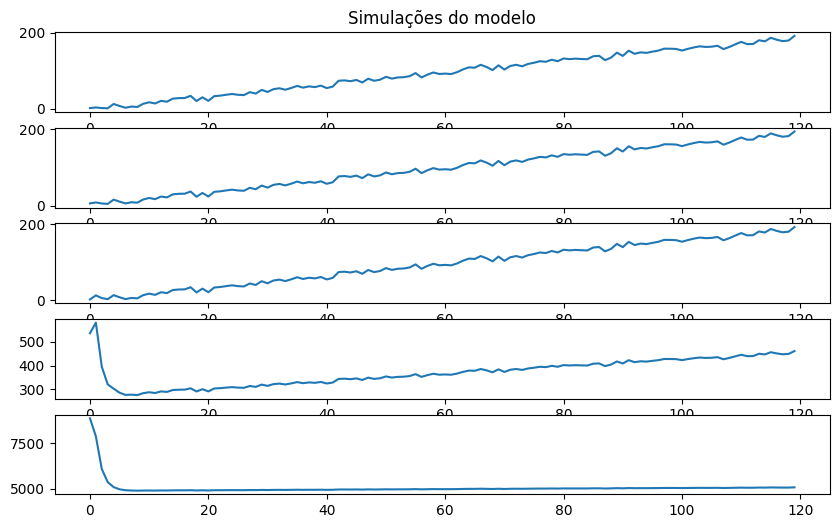

In [20]:
fig, ax = plt.subplots(5, figsize=(10,6))

for i in range(5):
    ax[i].plot(data.iloc[:,i])
ax[0].set_title('Simulações do modelo')
del data
plt.show()

## f)
O vetor de estado são dois componentes de nível, que seguem um passeio aleatório.  
O modelo não é estacionário nem observável. Como consequência, há uma indeterminação entre μt e ψt. Para corrigir a observabilidade, é possível remover uma das duas componentes com mesma estrutura.

In [21]:
Z = np.array([[1,1]])
T = np.array([[1,0], [0,1]])
R = np.array([[1,0], [0,1]])
c, d = c, d = np.zeros(T.shape[0]), np.zeros(1)

data = state_space_model(Z, T, R, c, d)

# cálculo dos autovalores
print("Autovalores: \n", np.linalg.eigvals(T))

Autovalores: 
 [1. 1.]


In [22]:
# cálculo da matriz M' 
M = calcula_M(Z,T)
print("Matriz M':\n", M)
rank_M = np.linalg.matrix_rank(M)
print("Posto da matriz M:", rank_M)

Matriz M':
 [[1 1]
 [1 1]]
Posto da matriz M: 1


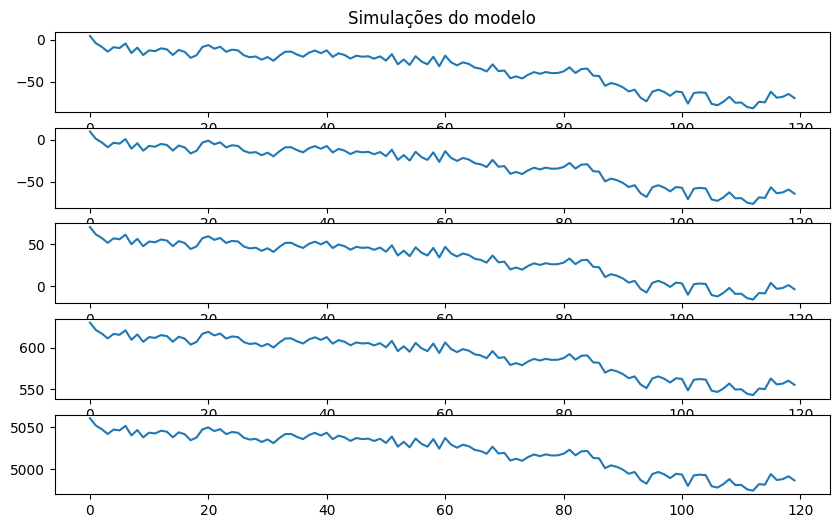

In [23]:
fig, ax = plt.subplots(5, figsize=(10,6))

for i in range(5):
    ax[i].plot(data.iloc[:,i])
ax[0].set_title('Simulações do modelo')
del data
plt.show()

## g) 
O vetor de estado é um componente de tendência linear com slope estocástico.  
O modelo é não estacionário e observável.

In [24]:
Z = np.array([[1,0]])
T = np.array([[1,1], [0,1]])
R = np.array([[1,0], [0,1]])
c, d = c, d = np.zeros(T.shape[0]), np.zeros(1)

data = state_space_model(Z, T, R, c, d)

# cálculo dos autovalores
print("Autovalores: \n", np.linalg.eigvals(T))

Autovalores: 
 [1. 1.]


In [25]:
# cálculo da matriz M' 
M = calcula_M(Z,T)
print("Matriz M':\n", M)
rank_M = np.linalg.matrix_rank(M)
print("Posto da matriz M:", rank_M)

Matriz M':
 [[1 1]
 [0 1]]
Posto da matriz M: 2


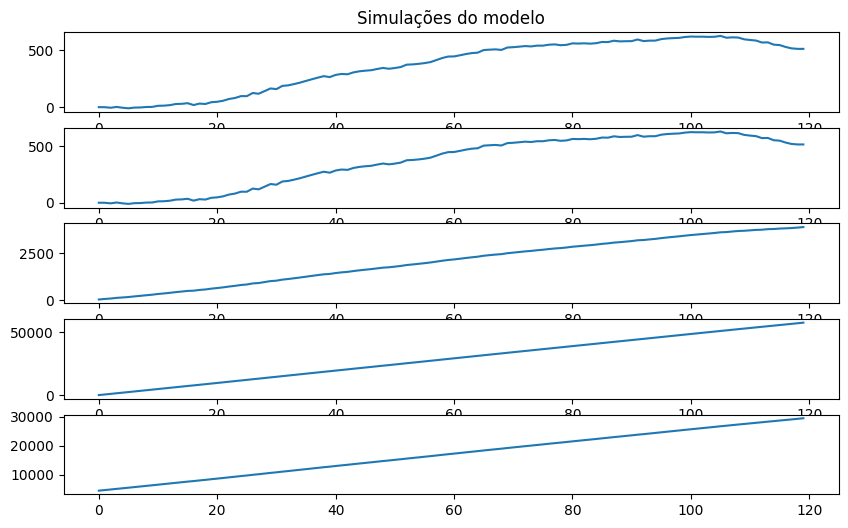

In [26]:
fig, ax = plt.subplots(5, figsize=(10,6))

for i in range(5):
    ax[i].plot(data.iloc[:,i])
ax[0].set_title('Simulações do modelo')
del data
plt.show()

## h)
O vetor de estado é um componente de nível local, que segue um passeio aleatório, e um componente não identificável, que também segue um passeio aleatório.  
O modelo não é estacionário nem observável. Para corrigir a observabilidade, deve-se remover a componente não identificavel, que não interfere nas observações.

In [27]:
Z = np.array([[1,0]])
T = np.array([[1,0], [0,1]])
R = np.array([[1,0], [0,1]])
c, d = c, d = np.zeros(T.shape[0]), np.zeros(1)

data = state_space_model(Z, T, R, c, d)

# cálculo dos autovalores
print("Autovalores: \n", np.linalg.eigvals(T))

Autovalores: 
 [1. 1.]


In [28]:
# cálculo da matriz M' 
M = calcula_M(Z,T)
print("Matriz M':\n", M)
rank_M = np.linalg.matrix_rank(M)
print("Posto da matriz M:", rank_M)

Matriz M':
 [[1 1]
 [0 0]]
Posto da matriz M: 1


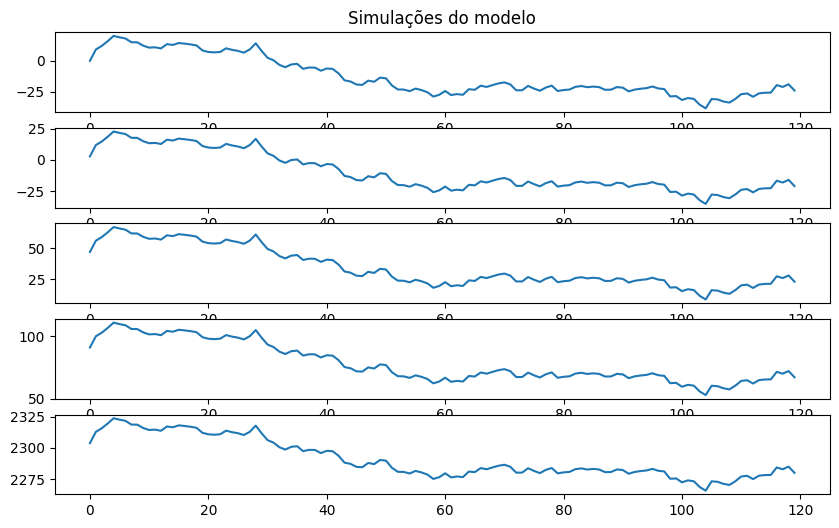

In [29]:
fig, ax = plt.subplots(5, figsize=(10,6))

for i in range(5):
    ax[i].plot(data.iloc[:,i])
ax[0].set_title('Simulações do modelo')
del data
plt.show()

## i)
O vetor de estado são duas componentes que seguem um AR(1).  
O modelo é estacionário e observável.

In [30]:
Z = np.array([[1,1]])

ϕ, γ = 0.3, 0.7
T = np.array([[ϕ,0], [0,γ]])
R = np.array([[1,0], [0,1]])
c, d = c, d = np.zeros(T.shape[0]), np.zeros(1)

data = state_space_model(Z, T, R, c, d)

# cálculo dos autovalores
print("Autovalores: \n", np.linalg.eigvals(T))

Autovalores: 
 [0.3 0.7]


In [31]:
# cálculo da matriz M' 
M = calcula_M(Z,T)
print("Matriz M':\n", M)
rank_M = np.linalg.matrix_rank(M)
print("Posto da matriz M:", rank_M)

Matriz M':
 [[1.  0.3]
 [1.  0.7]]
Posto da matriz M: 2


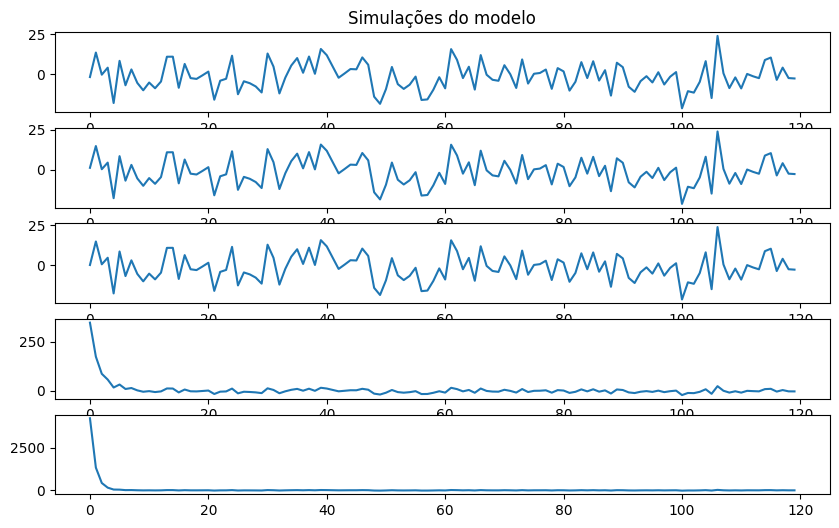

In [32]:
fig, ax = plt.subplots(5, figsize=(10,6))

for i in range(5):
    ax[i].plot(data.iloc[:,i])
ax[0].set_title('Simulações do modelo')
del data
plt.show()

## j)
O vetor de estado é uma componente que segue um passeio aleatório, e uma componente que segue um MA(1).  
O modelo é não estacionário e observável.

In [33]:
Z = np.array([[1,1,0]])

ϕ = 0.7
T = np.array([[1,0,0], [0,0,ϕ], [0,0,0]])
R = np.array([[1,0], [0,1], [0,1]])
c, d = c, d = np.zeros(T.shape[0]), np.zeros(1)
    
data = state_space_model(Z, T, R, c, d, σ=0)

# cálculo dos autovalores
print("Autovalores: \n", np.linalg.eigvals(T))

Autovalores: 
 [1. 0. 0.]


In [34]:
# cálculo da matriz M' 
M = calcula_M(Z,T)
print("Matriz M':\n", M)
rank_M = np.linalg.matrix_rank(M)
print("Posto da matriz M:", rank_M)

Matriz M':
 [[1.  1.  1. ]
 [1.  0.  0. ]
 [0.  0.7 0. ]]
Posto da matriz M: 3


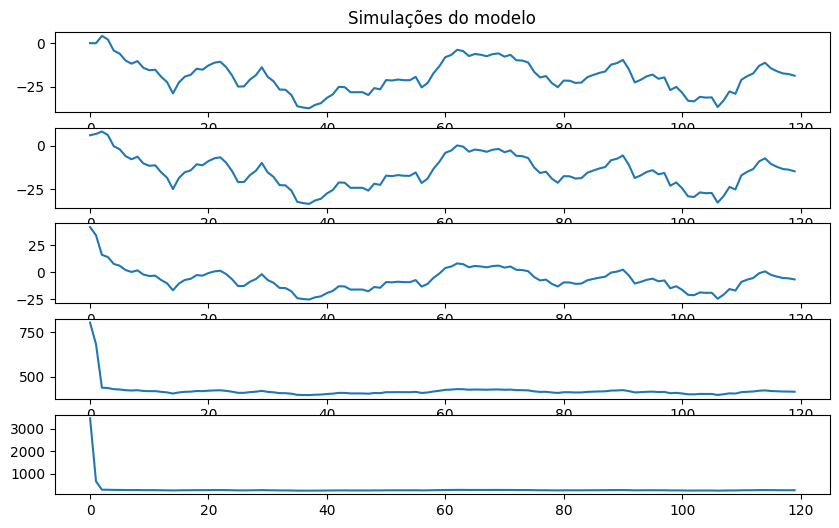

In [35]:
fig, ax = plt.subplots(5, figsize=(10,6))

for i in range(5):
    ax[i].plot(data.iloc[:,i])
ax[0].set_title('Simulações do modelo')
del data
plt.show()

## k)
O vetor de estado é uma componente que segue um passeio aleatório, e uma componente que segue um AR(1).  
O modelo é não estacionário e observável.

In [36]:
Z = np.array([[1,1]])

ϕ = 0.4
T = np.array([[1,0], [0,ϕ]])
R = np.array([[1,0], [0,1]])
c, d = c, d = np.zeros(T.shape[0]), np.zeros(1)
    
data = state_space_model(Z, T, R, c, d, σ=0)

# cálculo dos autovalores
print("Autovalores: \n", np.linalg.eigvals(T))

Autovalores: 
 [1.  0.4]


In [37]:
# cálculo da matriz M' 
M = calcula_M(Z,T)
print("Matriz M':\n", M)
rank_M = np.linalg.matrix_rank(M)
print("Posto da matriz M:", rank_M)

Matriz M':
 [[1.  1. ]
 [1.  0.4]]
Posto da matriz M: 2


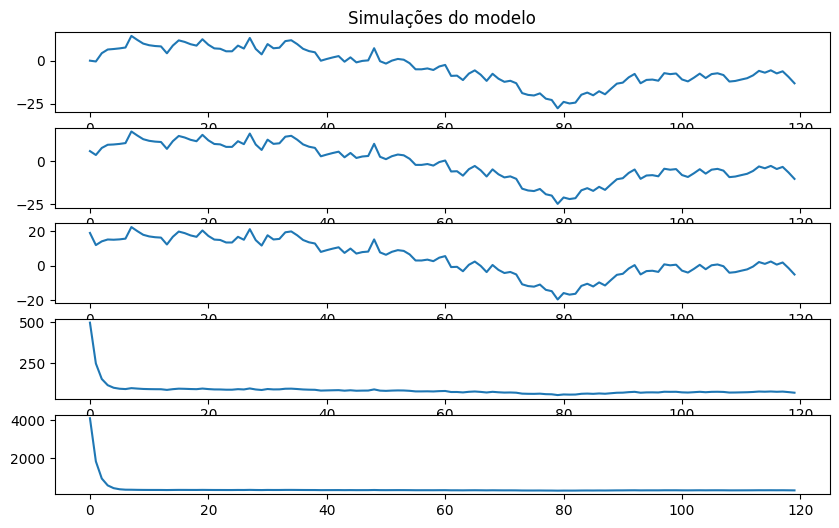

In [38]:
fig, ax = plt.subplots(5, figsize=(10,6))

for i in range(5):
    ax[i].plot(data.iloc[:,i])
ax[0].set_title('Simulações do modelo')
del data
plt.show()

## l.i) smooth slope
As componentes do vetor de estado são a tendência linear com slope estocástico.  
O modelo é não estacionário e observável.

In [39]:
Z = np.array([[1,0,0,0]])
T = np.array([[1,1,0,0], [0,3,-3,1], [0,1,0,0], [0,0,1,0]])
R = np.array([[1,0], [0,1], [0,0], [0,0]])
c, d = c, d = np.zeros(T.shape[0]), np.zeros(1)
    
data = state_space_model(Z, T, R, c, d)

# cálculo dos autovalores
print("Autovalores: \n", np.linalg.eigvals(T))

Autovalores: 
 [1.        +0.00000000e+00j 1.00000657+0.00000000e+00j
 0.99999671+5.69015387e-06j 0.99999671-5.69015387e-06j]


In [40]:
# cálculo da matriz M' 
M = calcula_M(Z,T)
print("Matriz M':\n", M)
rank_M = np.linalg.matrix_rank(M)
print("Posto da matriz M:", rank_M)

Matriz M':
 [[  1   1   1   1]
 [  0   1   4  10]
 [  0   0  -3 -11]
 [  0   0   1   4]]
Posto da matriz M: 4


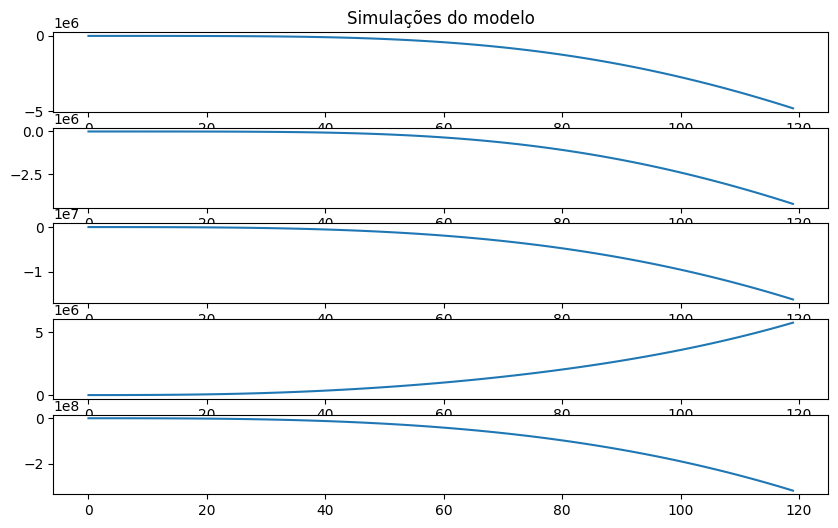

In [41]:
fig, ax = plt.subplots(5, figsize=(10,6))

for i in range(5):
    ax[i].plot(data.iloc[:,i])
ax[0].set_title('Simulações do modelo')
del data
plt.show()

## l.ii) stationary slope
As componentes do vetor de estado são a tendência linear com slope estocástico.  
O modelo é não estacionário e observável.

In [42]:
Z = np.array([[1,0,0]])
ϕ = 0.6
T = np.array([[1,1,0], [0,2*ϕ,-ϕ**2], [0,1,0]])
R = np.array([[1,0], [0,1], [0,0]])
c, d = c, d = np.zeros(T.shape[0]), np.zeros(1)
    
data = state_space_model(Z, T, R, c, d)

In [43]:
# cálculo dos autovalores
print("Autovalores: \n", np.linalg.eigvals(T))

Autovalores: 
 [1.  0.6 0.6]


In [44]:
# cálculo da matriz M' 
M = calcula_M(Z,T)
print("Matriz M':\n", M)
rank_M = np.linalg.matrix_rank(M)
print("Posto da matriz M:", rank_M)

Matriz M':
 [[ 1.    1.    1.  ]
 [ 0.    1.    2.2 ]
 [ 0.    0.   -0.36]]
Posto da matriz M: 3


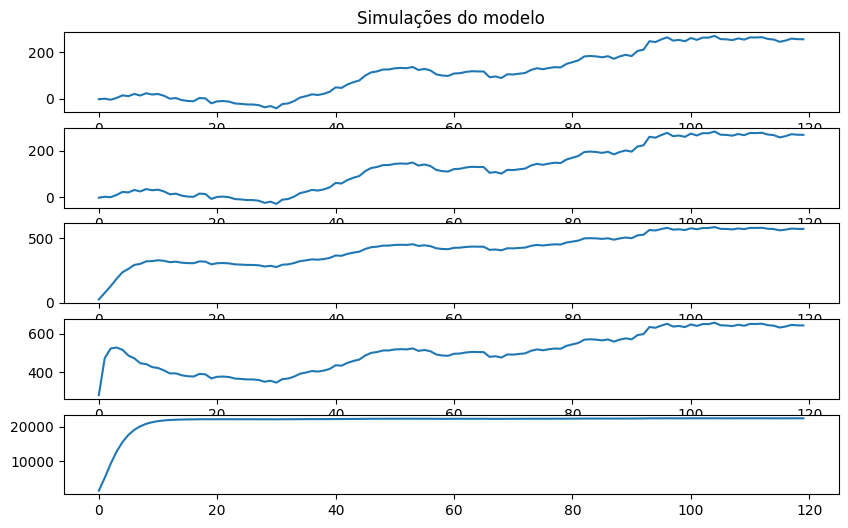

In [45]:
fig, ax = plt.subplots(5, figsize=(10,6))

for i in range(5):
    ax[i].plot(data.iloc[:,i])
ax[0].set_title('Simulações do modelo')
del data
plt.show()